# Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

Importing and Combining NO2 Data

In [2]:
no2_2015 = pd.read_csv("no2_2015.csv")
no2_2016 = pd.read_csv("no2_2016.csv")
no2_2017 = pd.read_csv("no2_2017.csv")
no2_2018 = pd.read_csv("no2_2018.csv")
no2_2019 = pd.read_csv("no2_2019.csv")
no2_2020 = pd.read_csv("no2_2020.csv")
no2_2021 = pd.read_csv("no2_2021.csv")
no2_2022 = pd.read_csv("no2_2022.csv")
no2_2023 = pd.read_csv("no2_2023.csv")
no2_2024 = pd.read_csv("no2_2024.csv")

In [3]:
no2_data = pd.concat([no2_2015, no2_2016, no2_2017, no2_2018, no2_2019, no2_2020, no2_2021, no2_2022, no2_2023, no2_2024], ignore_index=True)

In [4]:
no2_data.to_csv("no2_data.csv")

In [6]:
no2_data.isna().sum()

Date                                  0
Source                                0
Site ID                               0
POC                                   0
Daily Max 1-hour NO2 Concentration    0
Units                                 0
Daily AQI Value                       0
Local Site Name                       0
Daily Obs Count                       0
Percent Complete                      0
AQS Parameter Code                    0
AQS Parameter Description             0
Method Code                           0
CBSA Code                             0
CBSA Name                             0
State FIPS Code                       0
State                                 0
County FIPS Code                      0
County                                0
Site Latitude                         0
Site Longitude                        0
dtype: int64

Importing and Combining PM2.5 Data

In [51]:
pm25_2015 = pd.read_csv("pm2.5_2015.csv")
pm25_2016 = pd.read_csv("pm2.5_2016.csv")
pm25_2017 = pd.read_csv("pm2.5_2017.csv")
pm25_2018 = pd.read_csv("pm2.5_2018.csv")
pm25_2019 = pd.read_csv("pm2.5_2019.csv")
pm25_2020 = pd.read_csv("pm2.5_2020.csv")
pm25_2021 = pd.read_csv("pm2.5_2021.csv")
pm25_2022 = pd.read_csv("pm2.5_2022.csv")
pm25_2023 = pd.read_csv("pm2.5_2023.csv")
pm25_2024 = pd.read_csv("pm2.5_2024.csv")

In [97]:
pm25_data = pd.concat([pm25_2015, pm25_2016, pm25_2017, pm25_2018, pm25_2019, pm25_2020, pm25_2021, pm25_2022, pm25_2023, pm25_2024], ignore_index=True)

In [99]:
pm25_data["Date"] = pd.to_datetime(pm25_data["Date"])

In [100]:
pm25_data.to_csv("pm25_data.csv")

In [68]:
pm25_data['County'].unique()

array(['Alameda', 'Alpine', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Glenn',
       'Humboldt', 'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange', 'Placer',
       'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'San Mateo', 'Santa Barbara', 'Santa Clara',
       'Santa Cruz', 'Shasta', 'Siskiyou', 'Solano', 'Sonoma',
       'Stanislaus', 'Sutter', 'Tehama', 'Trinity', 'Tulare', 'Ventura',
       'Yolo'], dtype=object)

In [90]:
pm25_data['Daily AQI Value'].describe()

count    535775.000000
mean         42.129032
std          26.176041
min           0.000000
25%          24.000000
50%          41.000000
75%          55.000000
max        1493.000000
Name: Daily AQI Value, dtype: float64

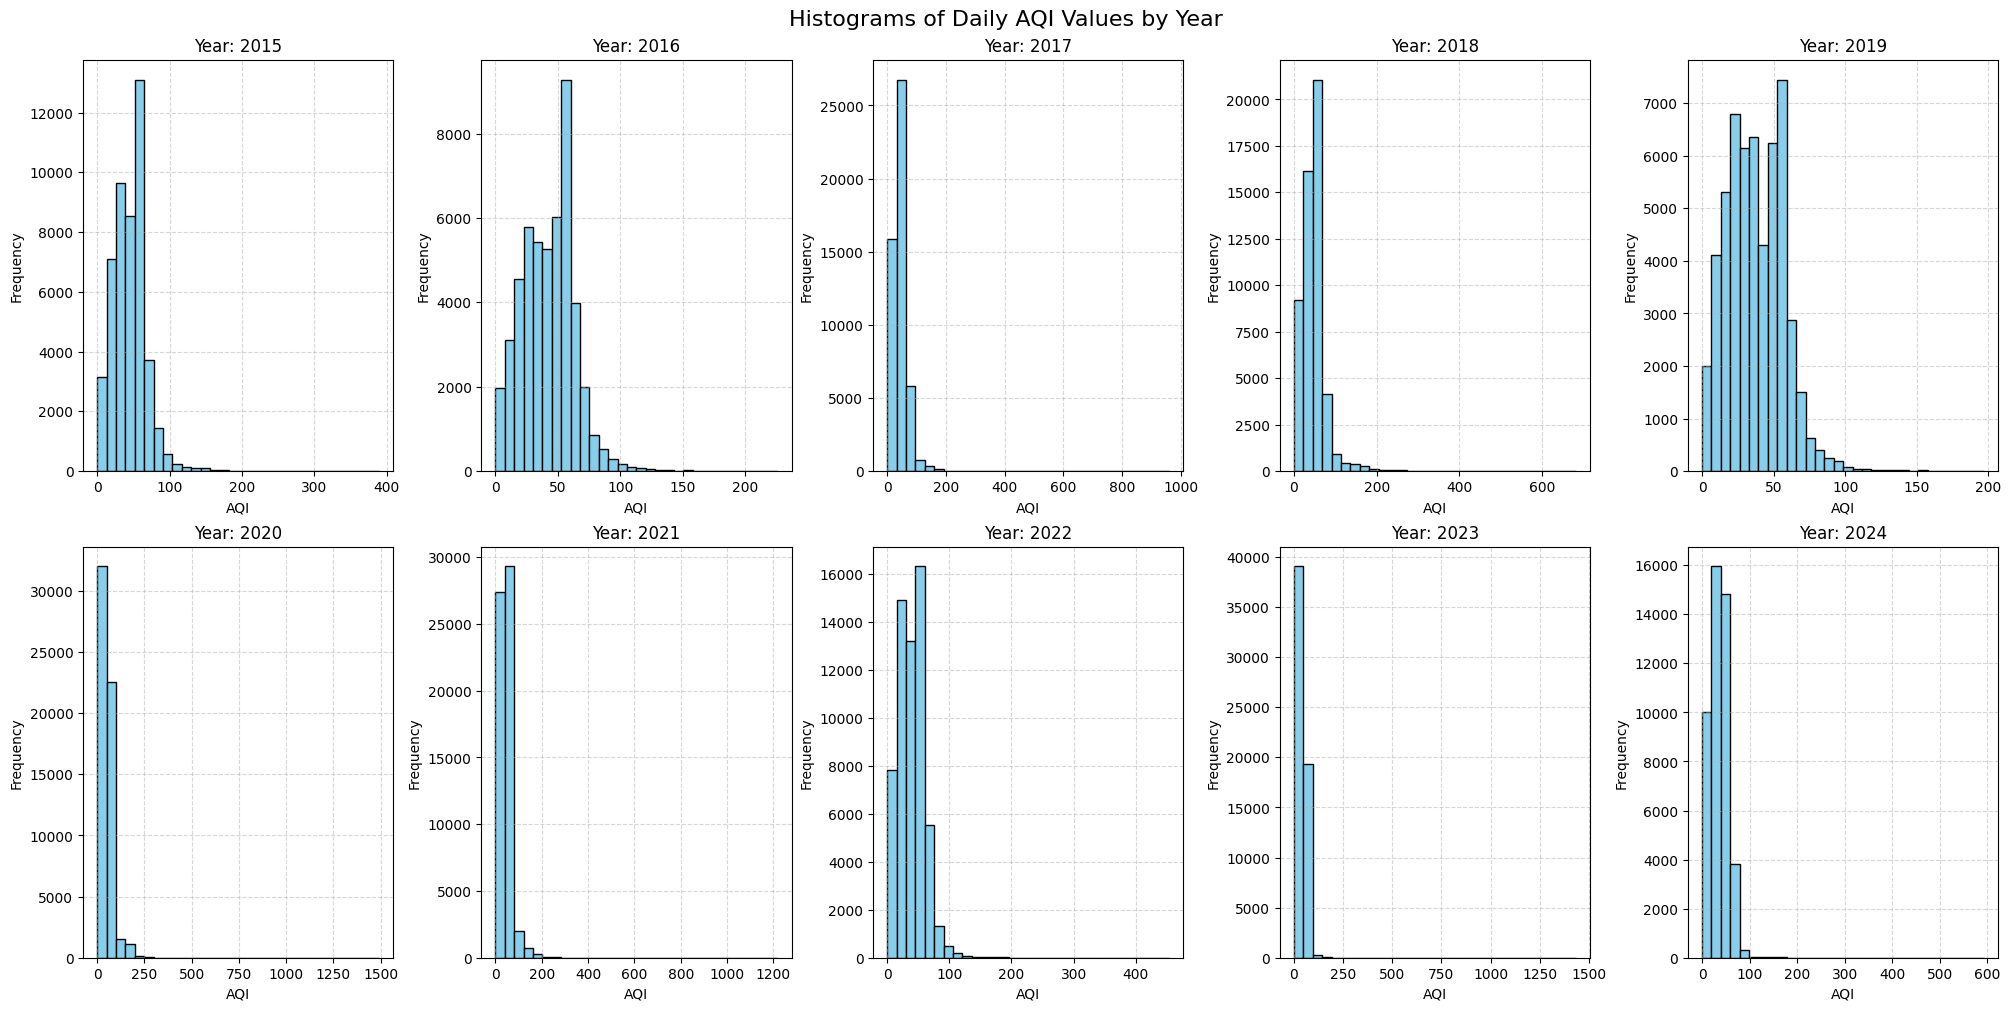

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Preprocess the data
pm25_data['Date'] = pd.to_datetime(pm25_data['Date'])  # Convert Date to datetime
pm25_data['Year'] = pm25_data['Date'].dt.year  # Extract year

# Extract unique years
unique_years = sorted(pm25_data['Year'].unique())

# Create subplots for histograms
fig, axes = plt.subplots(2, 5, figsize=(20, 10), constrained_layout=True)

# Loop through each year and plot histogram
for i, year in enumerate(unique_years):
    row, col = divmod(i, 5)  # Determine the subplot position
    ax = axes[row, col]
    
    # Filter data for the specific year
    year_data = pm25_data[pm25_data['Year'] == year]
    
    # Plot histogram for AQI values
    ax.hist(year_data['Daily AQI Value'], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Year: {year}', fontsize=12)
    ax.set_xlabel('AQI', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.grid(alpha=0.5, linestyle='--')

# Add a global title
fig.suptitle('Histograms of Daily AQI Values by Year', fontsize=16)
plt.show()


In [104]:
# Find the 100 highest AQI values for each year, keeping only Year and AQI
top_10_aqi_per_year = pm25_data.groupby('Year').apply(
    lambda group: group.nlargest(10, 'Daily AQI Value')[['Year', 'Daily AQI Value']]
).reset_index(drop=True)

# Display the result
print(top_10_aqi_per_year)


    Year  Daily AQI Value
0   2015              390
1   2015              313
2   2015              240
3   2015              214
4   2015              206
..   ...              ...
95  2024              208
96  2024              208
97  2024              196
98  2024              179
99  2024              174

[100 rows x 2 columns]


/var/folders/vv/2tyv9bm12sz47cjgm0593wqc0000gn/T/ipykernel_58355/699762335.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_aqi_per_year = pm25_data.groupby('Year').apply(


In [ ]:
# pm25_data = pm25_data[pm25_data['Daily AQI Value'] <= 500]


Monthly Average PM2.5 AQI for Butte County and Plumas County vs All Other Counties

/var/folders/vv/2tyv9bm12sz47cjgm0593wqc0000gn/T/ipykernel_58355/1028088192.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Date"]=pd.to_datetime(filtered_data["Date"])
/var/folders/vv/2tyv9bm12sz47cjgm0593wqc0000gn/T/ipykernel_58355/1028088192.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_data["Date"]=pd.to_datetime(other_data["Date"])


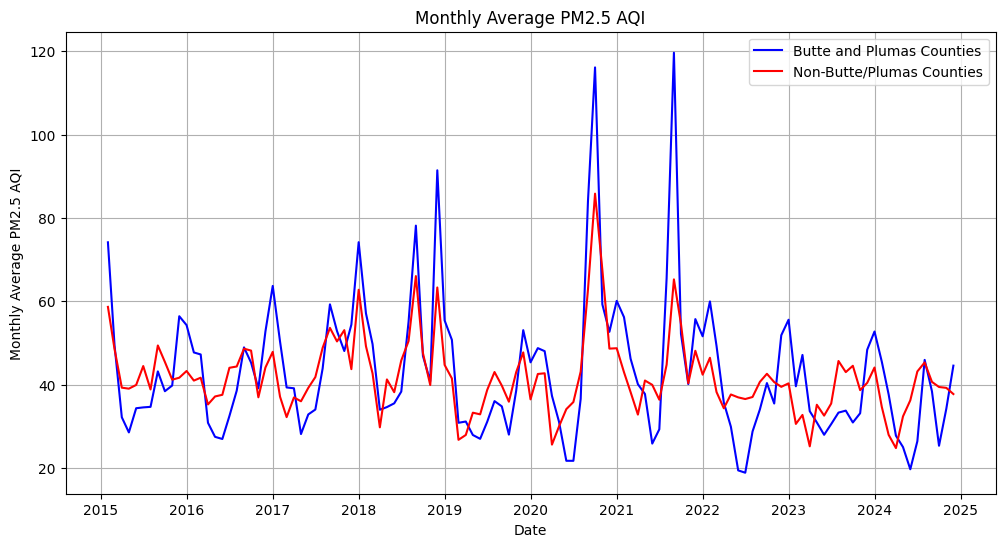

In [92]:
counties = ["Butte", "Plumas"]
filtered_data = pm25_data[pm25_data['County'].isin(counties)]
other_data = pm25_data[~pm25_data['County'].isin(counties)]

filtered_data["Date"]=pd.to_datetime(filtered_data["Date"])
other_data["Date"]=pd.to_datetime(other_data["Date"])

filtered_data.set_index('Date', inplace=True)
other_data.set_index('Date', inplace=True)

# Calculate the monthly average of 'Daily AQI Value'
monthly_avg_butte_plumas = filtered_data.resample('ME')['Daily AQI Value'].mean().reset_index()
monthly_avg_non_butte_plumas = other_data.resample('ME')['Daily AQI Value'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_butte_plumas['Date'], monthly_avg_butte_plumas['Daily AQI Value'], color="blue", label="Butte and Plumas Counties")
plt.plot(monthly_avg_non_butte_plumas['Date'], monthly_avg_non_butte_plumas['Daily AQI Value'], color="red", label='Non-Butte/Plumas Counties')
plt.xlabel('Date')
plt.ylabel('Monthly Average PM2.5 AQI')
plt.title('Monthly Average PM2.5 AQI')
plt.legend()
plt.grid(True)
plt.show()

Monthly Average PM2.5 AQI for Butte County vs All Other Counties

/var/folders/vv/2tyv9bm12sz47cjgm0593wqc0000gn/T/ipykernel_58355/917569718.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  butte["Date"]=pd.to_datetime(butte["Date"])
/var/folders/vv/2tyv9bm12sz47cjgm0593wqc0000gn/T/ipykernel_58355/917569718.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_butte["Date"]=pd.to_datetime(non_butte["Date"])


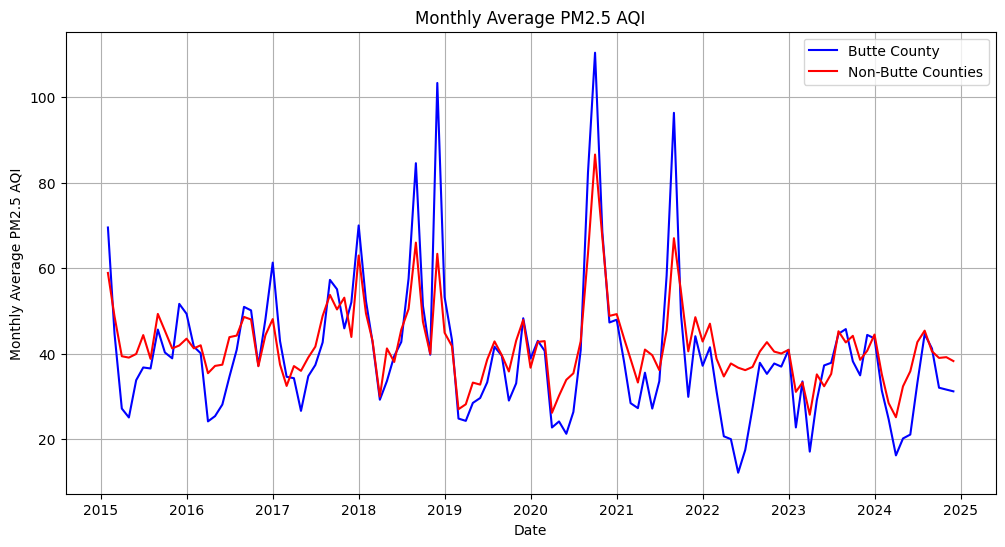

In [93]:
butte = pm25_data[pm25_data["County"] == "Butte"]
non_butte = pm25_data[pm25_data["County"] != "Butte"]

butte["Date"]=pd.to_datetime(butte["Date"])
non_butte["Date"]=pd.to_datetime(non_butte["Date"])

butte.set_index('Date', inplace=True)
non_butte.set_index('Date', inplace=True)

# Calculate the monthly average of 'Daily AQI Value'
monthly_avg_butte = butte.resample('ME')['Daily AQI Value'].mean().reset_index()
monthly_avg_non_butte = non_butte.resample('ME')['Daily AQI Value'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_butte['Date'], monthly_avg_butte['Daily AQI Value'], color="blue", label="Butte County")
plt.plot(monthly_avg_non_butte['Date'], monthly_avg_non_butte['Daily AQI Value'], color="red", label="Non-Butte Counties")
plt.xlabel('Date')
plt.ylabel('Monthly Average PM2.5 AQI')
plt.title('Monthly Average PM2.5 AQI')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
full_df = pd.read_csv("full_df.csv")

Average Monthly NO2 AQI for All of California

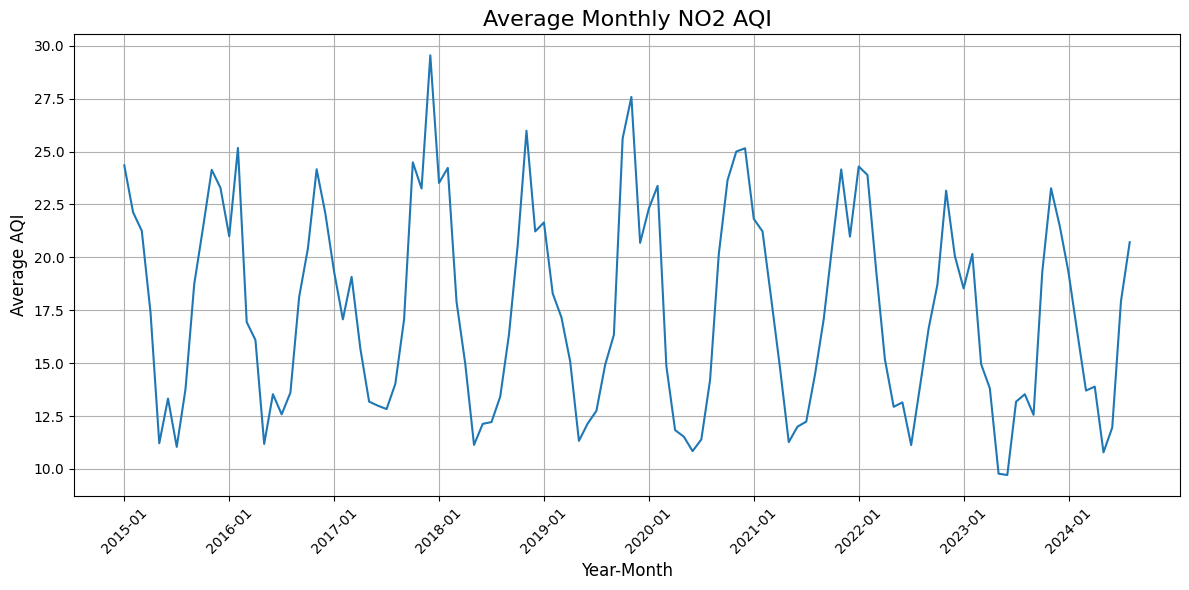

In [94]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert the Date column to datetime
no2_data['Date'] = pd.to_datetime(no2_data['Date'], format='%m/%d/%Y')

# Extract year and month from the Date column
no2_data['YearMonth'] = no2_data['Date'].dt.to_period('M')

# Calculate the average AQI for each month
monthly_avg_aqi = no2_data.groupby('YearMonth')['Daily AQI Value'].mean().reset_index()

# Plot the average monthly AQI
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_aqi['YearMonth'].astype(str), monthly_avg_aqi['Daily AQI Value'])
plt.title('Average Monthly NO2 AQI', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Average AQI', fontsize=12)

# Adjust x-axis ticks to show fewer labels
x_labels = monthly_avg_aqi['YearMonth'].astype(str)
step = 12
plt.xticks(range(0, len(x_labels), step), x_labels[::step], rotation=45, fontsize=10)

plt.grid(True)
plt.tight_layout()
plt.show()


Average Monthly NO2 for All of California

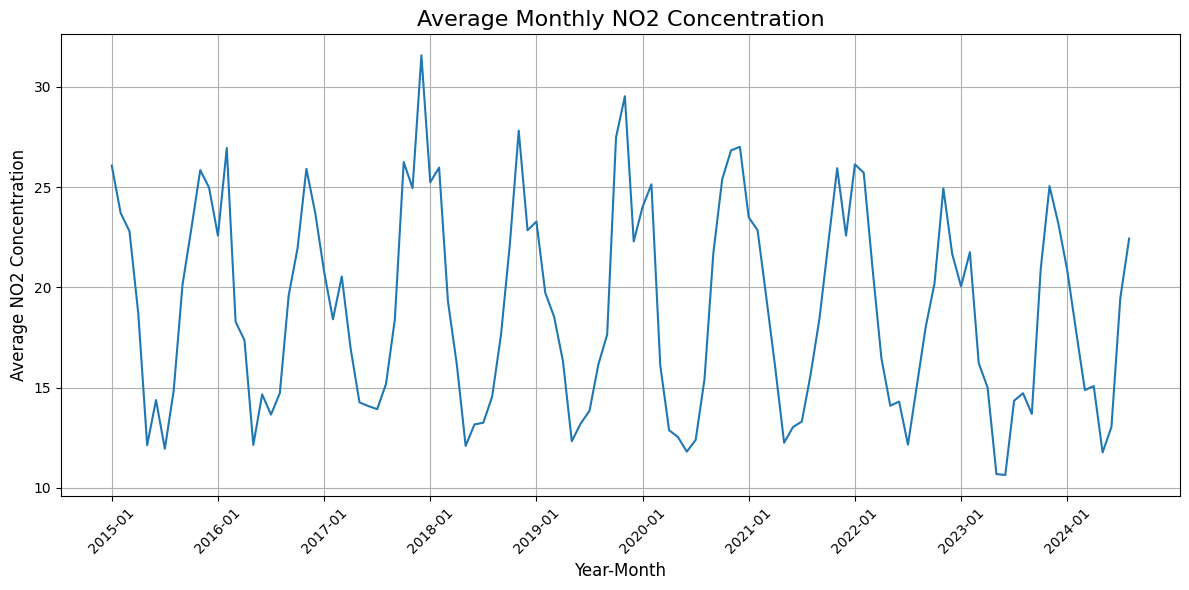

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert the Date column to datetime
no2_data['Date'] = pd.to_datetime(no2_data['Date'], format='%m/%d/%Y')

# Extract year and month from the Date column
no2_data['YearMonth'] = no2_data['Date'].dt.to_period('M')

# Calculate the average AQI for each month
monthly_avg_no2 = no2_data.groupby('YearMonth')['Daily Max 1-hour NO2 Concentration'].mean().reset_index()

# Plot the average monthly AQI
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_no2['YearMonth'].astype(str), monthly_avg_no2['Daily Max 1-hour NO2 Concentration'])
plt.title('Average Monthly NO2 Concentration', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Average NO2 Concentration', fontsize=12)

# Adjust x-axis ticks to show fewer labels
x_labels = monthly_avg_aqi['YearMonth'].astype(str)
step = 12
plt.xticks(range(0, len(x_labels), step), x_labels[::step], rotation=45, fontsize=10)

plt.grid(True)
plt.tight_layout()
plt.show()

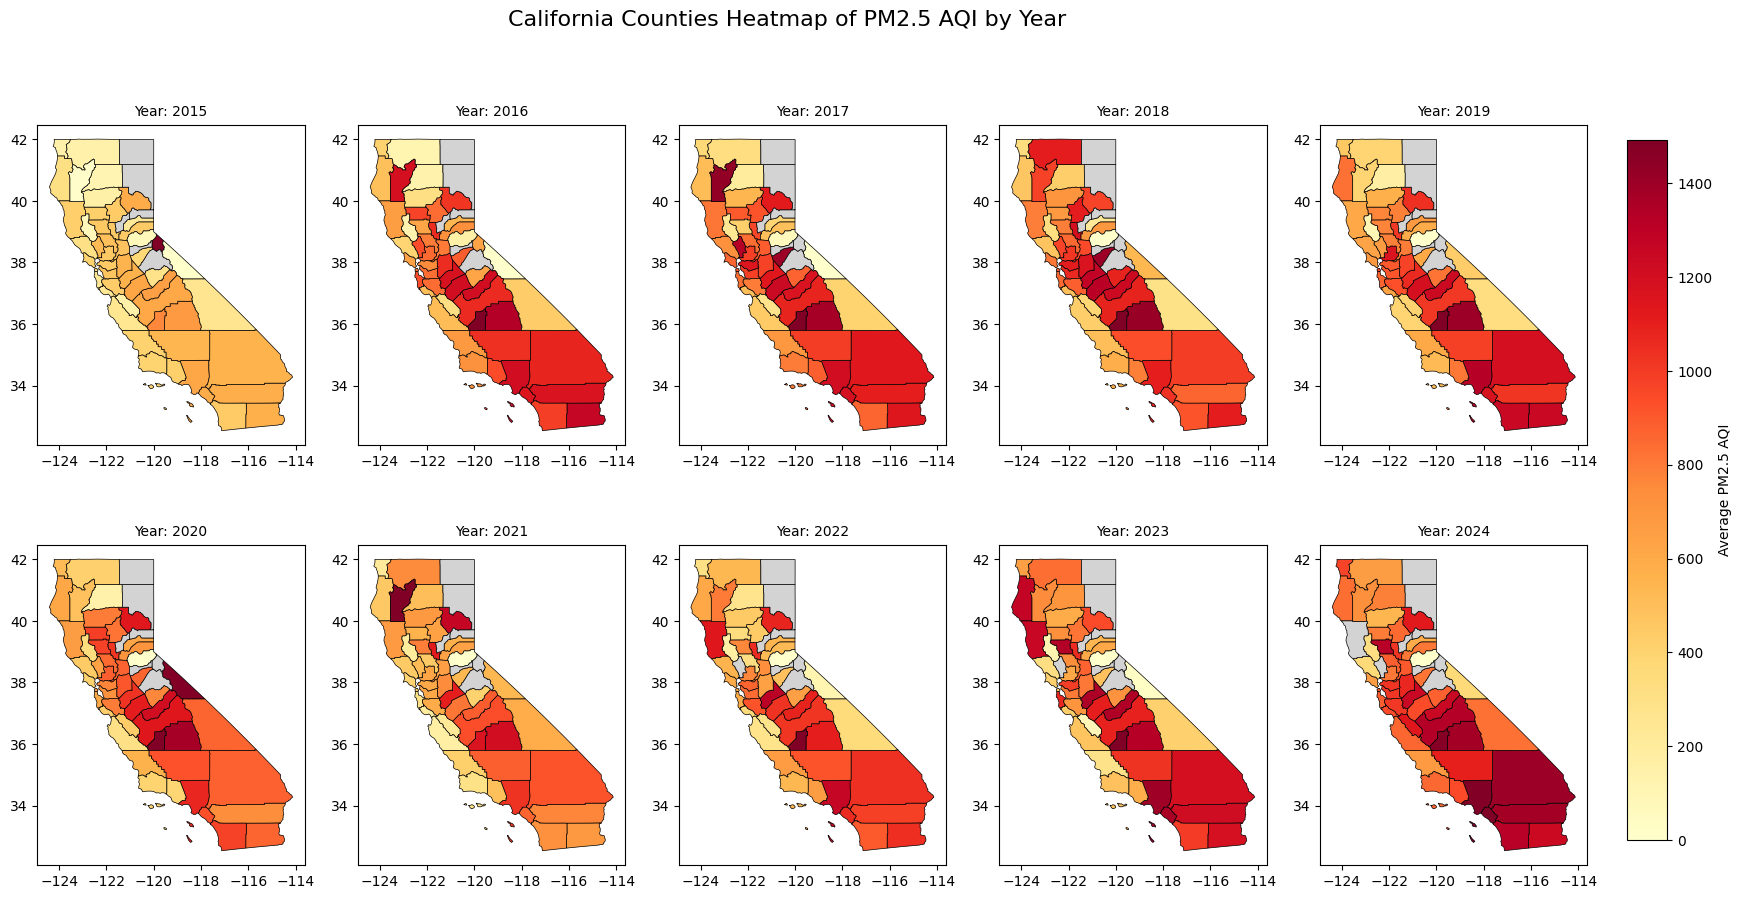

In [105]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the GeoJSON file
geojson_path = 'california-counties_780.geojson'
california_geojson = gpd.read_file(geojson_path)

# Fix any invalid geometries
california_geojson['geometry'] = california_geojson['geometry'].apply(
    lambda geom: geom if geom.is_valid else geom.buffer(0))

# Ensure the 'County' column in pm25_data matches the GeoJSON's 'NAME' column
pm25_data['County'] = pm25_data['County'].str.title()  # Adjust capitalization if needed
pm25_data['Date'] = pd.to_datetime(pm25_data['Date'])
pm25_data['Year'] = pm25_data['Date'].dt.year

# Create a grid of subplots (2 rows x 5 columns for 10 years)
unique_years = sorted(pm25_data['Year'].unique())  # Get unique years
n_years = len(unique_years)
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

# Set up a color normalization for consistent scaling
vmin = pm25_data['Daily AQI Value'].min()
vmax = pm25_data['Daily AQI Value'].max()

# Loop through each year and create a heatmap
for i, year in enumerate(unique_years):
    # Filter data for the specific year
    year_data = pm25_data[pm25_data['Year'] == year]
    
    # Group by County and calculate the average AQI for the year
    county_aqi = year_data.groupby('County')['Daily AQI Value'].mean().reset_index()
    county_aqi.columns = ['NAME', 'Average AQI']  # Rename to match GeoJSON's 'NAME' column
    
    # Merge GeoJSON with AQI data for the year
    merged_geo = california_geojson.merge(county_aqi, on='NAME', how='left')
    
    # Determine subplot row and column
    row, col = divmod(i, 5)
    
    # Plot heatmap for the year
    ax = axes[row, col]
    merged_geo.plot(
        column='Average AQI',
        cmap='YlOrRd',  # Sequential colormap for AQI values
        legend=False,  # Turn off individual legends
        edgecolor='black',
        linewidth=0.5,
        ax=ax,
        missing_kwds={"color": "lightgrey", "label": "No Data"}
    )
    
    ax.set_title(f'Year: {year}', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Adjust the overall layout to make space for the colorbar
fig.subplots_adjust(right=0.9)  # Leave space to the right for the colorbar

# Add a single colorbar outside the grid
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Adjust these values to avoid overlap
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []  # Dummy array for the colorbar
fig.colorbar(sm, cax=cax, label='Average PM2.5 AQI')

# Add a global title and show the plot
fig.suptitle('California Counties Heatmap of PM2.5 AQI by Year', fontsize=16)
plt.show()




<Figure size 1200x800 with 0 Axes>

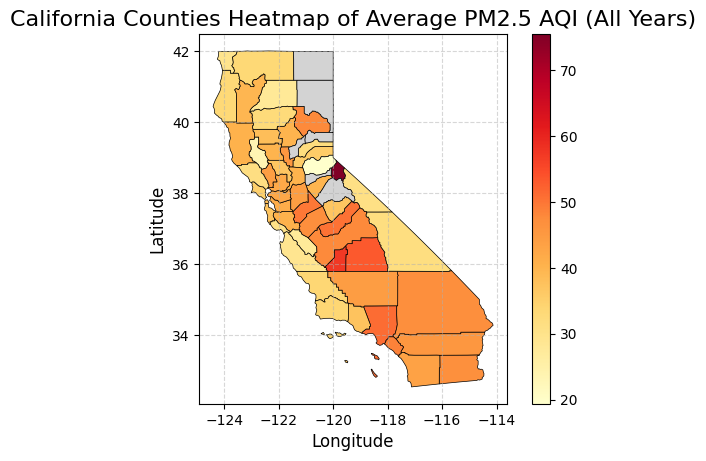

In [96]:
# Group by County and calculate the mean AQI across all years
county_aqi_all_years = pm25_data.groupby('County')['Daily AQI Value'].mean().reset_index()
county_aqi_all_years.columns = ['NAME', 'Average AQI']  # Rename to match GeoJSON's 'NAME' column

# Merge GeoJSON with AQI data using the 'NAME' column
merged_geo_all_years = california_geojson.merge(county_aqi_all_years, on='NAME', how='left')

# Plot the heatmap
plt.figure(figsize=(12, 8))
merged_geo_all_years.plot(
    column='Average AQI',
    cmap='YlOrRd',  # Sequential colormap for AQI values
    legend=True,
    edgecolor='black',
    linewidth=0.5,
    missing_kwds={"color": "lightgrey", "label": "No Data"}
)
plt.title('California Counties Heatmap of Average PM2.5 AQI (All Years)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


Heatmap of Average NO2 AQI by County

<Figure size 1200x800 with 0 Axes>

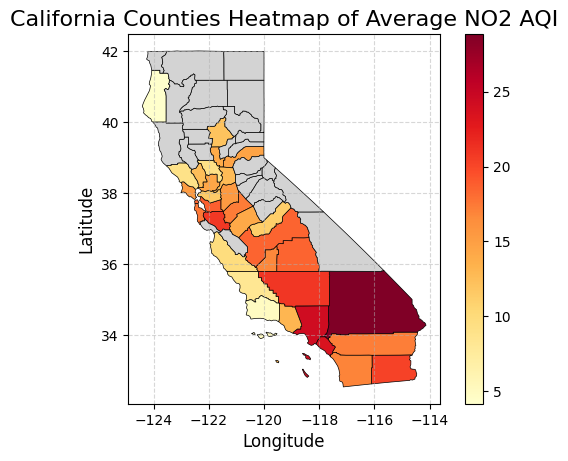

In [48]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the GeoJSON file
geojson_path = 'california-counties_780.geojson'
california_geojson = gpd.read_file(geojson_path)

# Fix any invalid geometries
california_geojson['geometry'] = california_geojson['geometry'].apply(
    lambda geom: geom if geom.is_valid else geom.buffer(0))

# Load the AQI dataset
file_path = 'no2_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Group by County and calculate the average AQI
county_aqi = data.groupby('County')['Daily AQI Value'].mean().reset_index()
county_aqi.columns = ['NAME', 'Average AQI']  # Rename to match GeoJSON's 'NAME' column

# Merge GeoJSON with AQI data using the 'NAME' column
merged_geo = california_geojson.merge(county_aqi, on='NAME', how='left')

# Plot the heatmap with a sequential colormap
plt.figure(figsize=(12, 8))
merged_geo.plot(
    column='Average AQI',
    cmap='YlOrRd',  # Sequential colormap for AQI values
    legend=True,
    edgecolor='black',
    linewidth=0.5,
    missing_kwds={"color": "lightgrey", "label": "No Data"}
)
plt.title('California Counties Heatmap of Average NO2 AQI', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



Heatmap of Average NO2 Concentration by County

<Figure size 1200x800 with 0 Axes>

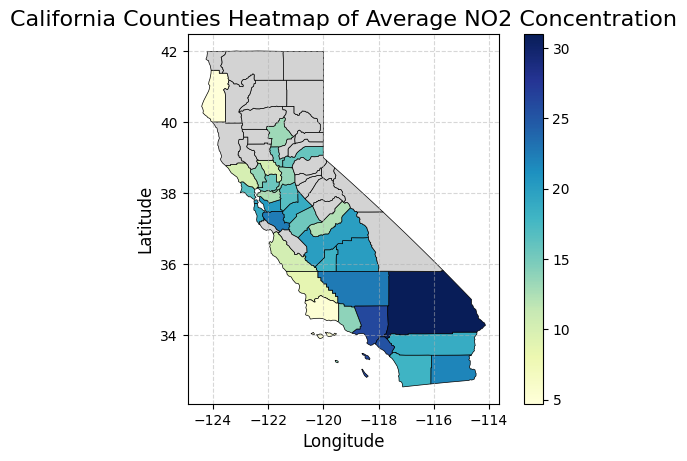

In [12]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the GeoJSON file
geojson_path = 'california-counties_780.geojson'
california_geojson = gpd.read_file(geojson_path)

# Fix any invalid geometries
california_geojson['geometry'] = california_geojson['geometry'].apply(
    lambda geom: geom if geom.is_valid else geom.buffer(0))

# Load the AQI dataset
file_path = 'no2_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Group by County and calculate the average NO2 concentration
county_no2 = data.groupby('County')['Daily Max 1-hour NO2 Concentration'].mean().reset_index()
county_no2.columns = ['NAME', 'Average NO2']  # Rename to match GeoJSON's 'NAME' column

# Merge GeoJSON with NO2 data using the 'NAME' column
merged_geo = california_geojson.merge(county_no2, on='NAME', how='left')

# Plot the heatmap with a sequential colormap
plt.figure(figsize=(12, 8))
merged_geo.plot(
    column='Average NO2',
    cmap='YlGnBu',  # Sequential colormap for NO2 values
    legend=True,
    edgecolor='black',
    linewidth=0.5,
    missing_kwds={"color": "lightgrey", "label": "No Data"}
)
plt.title('California Counties Heatmap of Average NO2 Concentration', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [17]:
ozone_data = pd.read_csv("Ozone.csv")
co_data = pd.read_csv("california_CO.csv")

ozone_data['Date'] = pd.to_datetime(ozone_data['Date'])
co_data['Date'] = pd.to_datetime(co_data['Date'])

In [19]:
ozone_data.columns

Index(['Date', 'Source', 'Site ID', 'POC',
       'Daily Max 8-hour Ozone Concentration', 'Units', 'Daily AQI Value',
       'Local Site Name', 'Daily Obs Count', 'Percent Complete',
       'AQS Parameter Code', 'AQS Parameter Description', 'Method Code',
       'CBSA Code', 'CBSA Name', 'State FIPS Code', 'State',
       'County FIPS Code', 'County', 'Site Latitude', 'Site Longitude'],
      dtype='object')

In [20]:
co_data.columns

Index(['Date', 'Source', 'Site ID', 'POC', 'Daily Max 8-hour CO Concentration',
       'Units', 'Daily AQI Value', 'Local Site Name', 'Daily Obs Count',
       'Percent Complete', 'AQS Parameter Code', 'AQS Parameter Description',
       'Method Code', 'CBSA Code', 'CBSA Name', 'State FIPS Code', 'State',
       'County FIPS Code', 'County', 'Site Latitude', 'Site Longitude'],
      dtype='object')

In [26]:
co_data['Daily Max 8-hour CO Concentration'] = co_data['Daily Max 8-hour CO Concentration'] * 1000
ozone_data["Daily Max 8-hour Ozone Concentration"] = ozone_data["Daily Max 8-hour Ozone Concentration"] * 1000
co_data["Units"] = "ppb"
ozone_data["Units"] = "ppb"

/var/folders/vv/2tyv9bm12sz47cjgm0593wqc0000gn/T/ipykernel_58355/2381681767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])
/var/folders/vv/2tyv9bm12sz47cjgm0593wqc0000gn/T/ipykernel_58355/2381681767.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['YearMonth'] = filtered_data['Date'].dt.to_period('M')


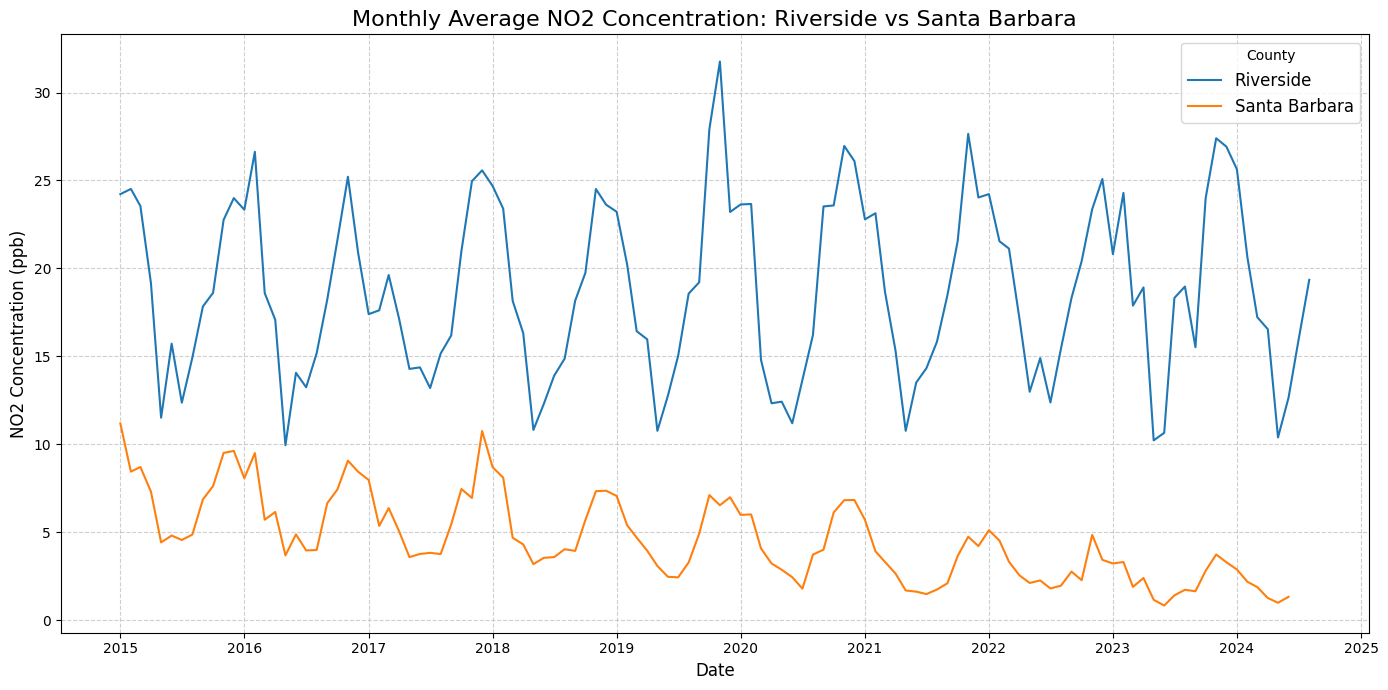

In [27]:
import matplotlib.pyplot as plt

# Filter the data for Riverside and Santa Barbara counties
filtered_data = no2_data[no2_data['County'].isin(['Riverside', 'Santa Barbara'])]

# Convert the 'Date' column to datetime format for grouping
filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])

# Add a 'YearMonth' column to group by month
filtered_data['YearMonth'] = filtered_data['Date'].dt.to_period('M')

# Group by County and YearMonth, then calculate the average NO2 concentration
monthly_avg_no2 = filtered_data.groupby(['YearMonth', 'County'])['Daily Max 1-hour NO2 Concentration'].mean().reset_index()

# Convert 'YearMonth' back to datetime for plotting
monthly_avg_no2['YearMonth'] = monthly_avg_no2['YearMonth'].dt.to_timestamp()

# Plot the monthly averages for Riverside and Santa Barbara
plt.figure(figsize=(14, 7))
for county in ['Riverside', 'Santa Barbara']:
    county_data = monthly_avg_no2[monthly_avg_no2['County'] == county]
    plt.plot(county_data['YearMonth'], county_data['Daily Max 1-hour NO2 Concentration'], label=county)

# Customize the plot
plt.title('Monthly Average NO2 Concentration: Riverside vs Santa Barbara', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('NO2 Concentration (ppb)', fontsize=12)
plt.legend(title='County', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


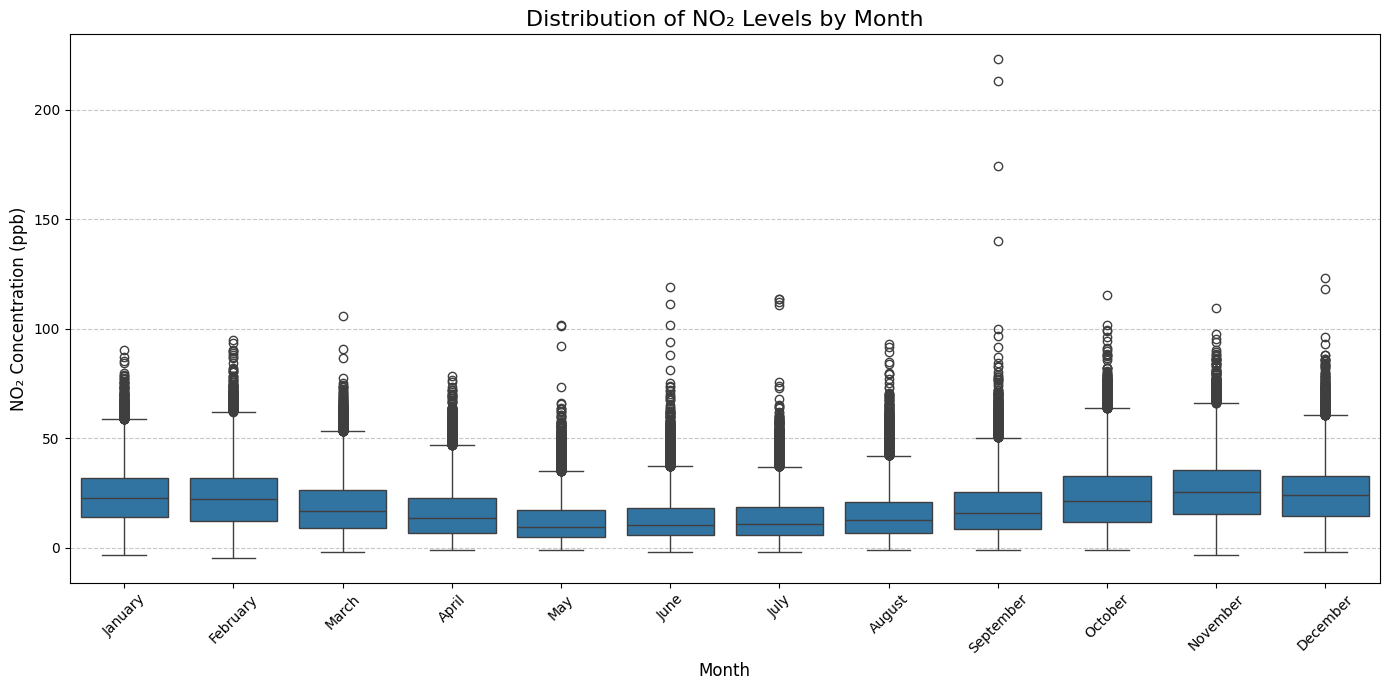

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the month from the Date column
no2_data['Date'] = pd.to_datetime(no2_data['Date'])
no2_data['Month'] = no2_data['Date'].dt.month_name()

# Order the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Create the boxplot
plt.figure(figsize=(14, 7))
sns.boxplot(x='Month', y='Daily Max 1-hour NO2 Concentration', data=no2_data, order=month_order)
plt.title('Distribution of NO₂ Levels by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('NO₂ Concentration (ppb)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


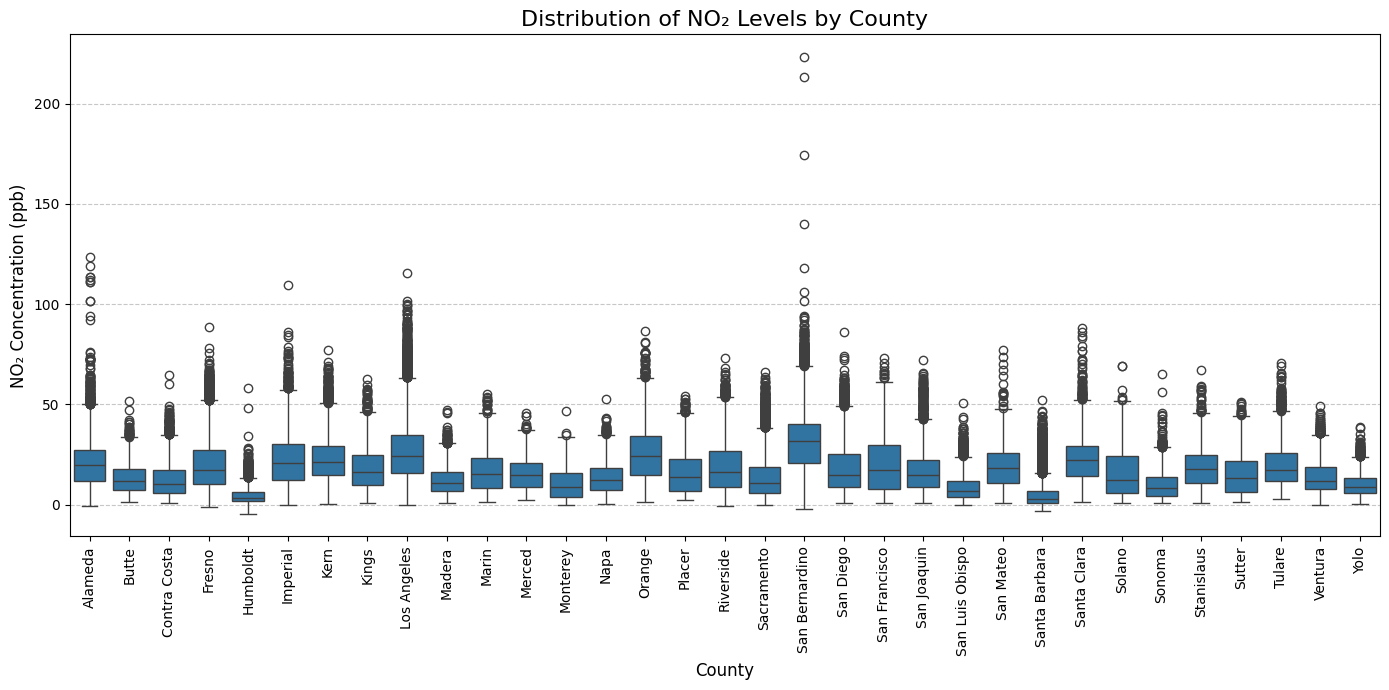

In [29]:
# Create the boxplot for counties
plt.figure(figsize=(14, 7))
sns.boxplot(x='County', y='Daily Max 1-hour NO2 Concentration', data=no2_data)
plt.title('Distribution of NO₂ Levels by County', fontsize=16)
plt.xlabel('County', fontsize=12)
plt.ylabel('NO₂ Concentration (ppb)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


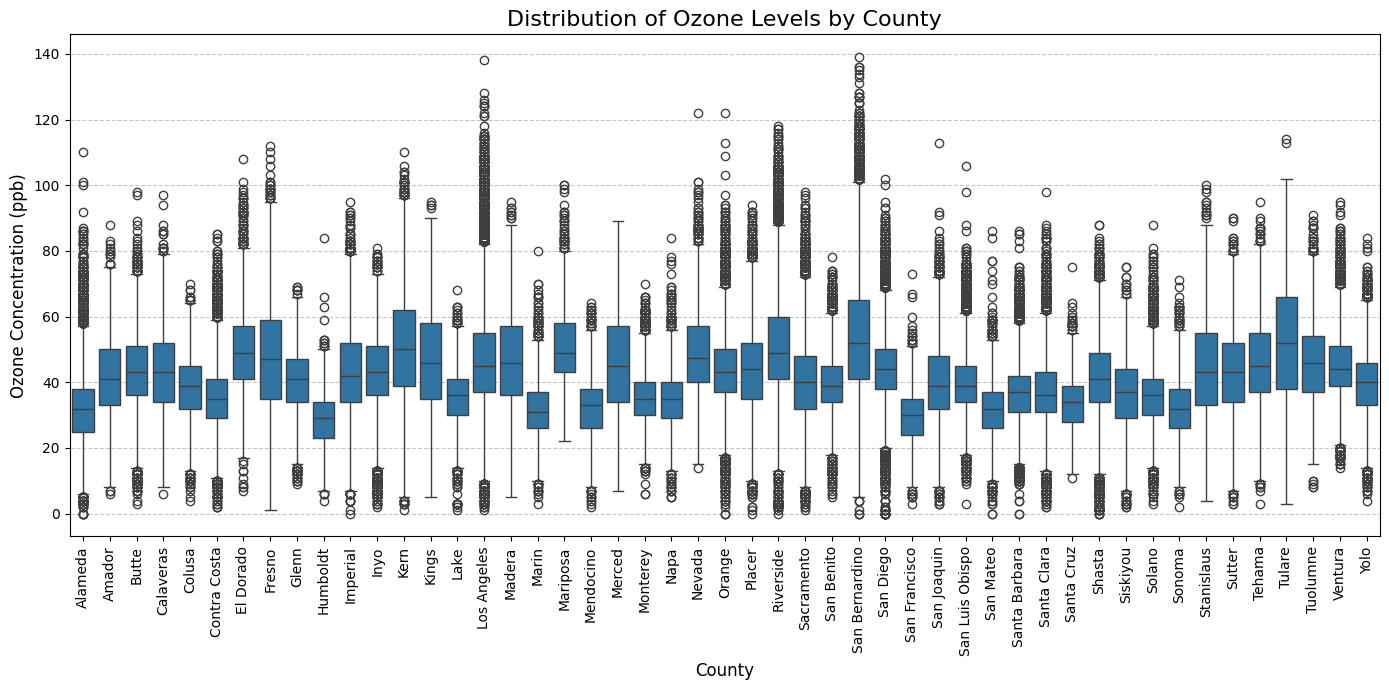

In [36]:
# Create the boxplot for counties
plt.figure(figsize=(14, 7))
sns.boxplot(x='County', y='Daily Max 8-hour Ozone Concentration', data=ozone_data)
plt.title('Distribution of Ozone Levels by County', fontsize=16)
plt.xlabel('County', fontsize=12)
plt.ylabel('Ozone Concentration (ppb)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

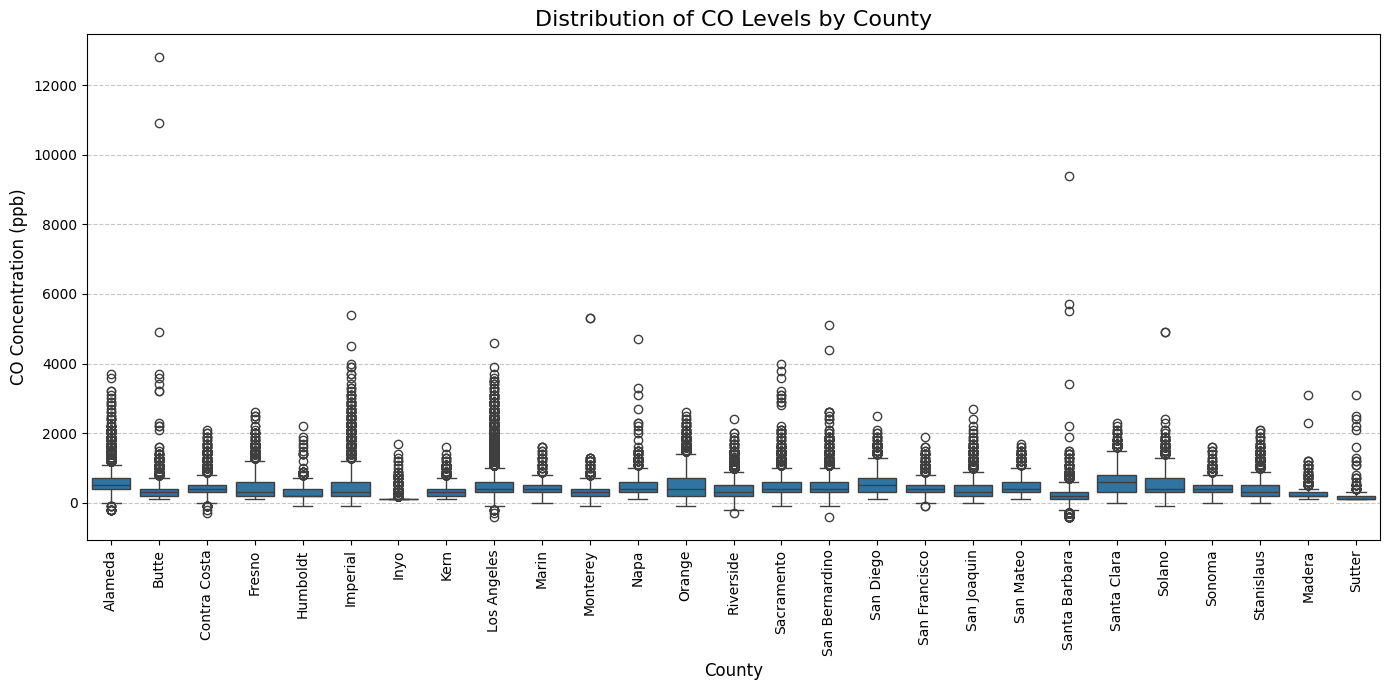

In [37]:
# Create the boxplot for counties
plt.figure(figsize=(14, 7))
sns.boxplot(x='County', y='Daily Max 8-hour CO Concentration', data=co_data)
plt.title('Distribution of CO Levels by County', fontsize=16)
plt.xlabel('County', fontsize=12)
plt.ylabel('CO Concentration (ppb)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Daily Average Levels of NO₂, O₃, and CO Over Time

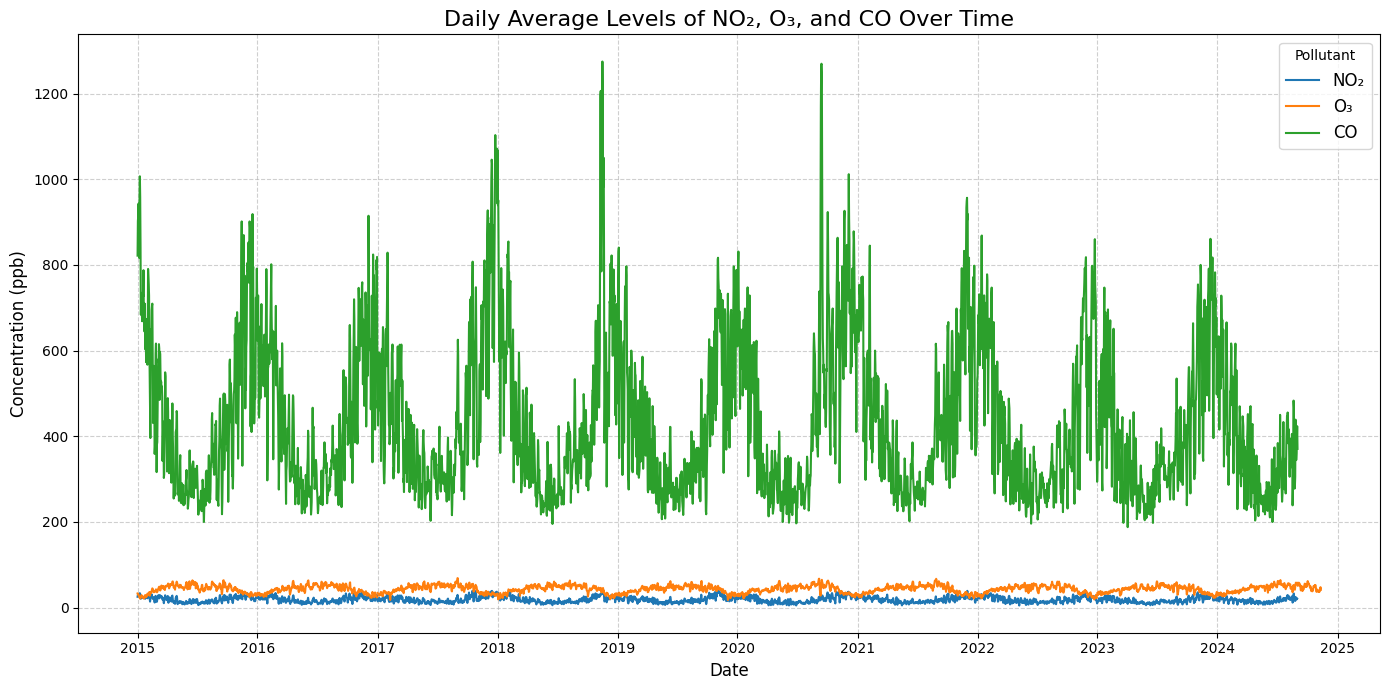

In [31]:
import matplotlib.pyplot as plt

# Prepare the NO2 data
no2_data['Date'] = pd.to_datetime(no2_data['Date'])
no2_daily_avg = no2_data.groupby('Date')['Daily Max 1-hour NO2 Concentration'].mean().reset_index()

# Prepare the Ozone data
ozone_data['Date'] = pd.to_datetime(ozone_data['Date'])
ozone_daily_avg = ozone_data.groupby('Date')['Daily Max 8-hour Ozone Concentration'].mean().reset_index()

# Prepare the CO data
co_data['Date'] = pd.to_datetime(co_data['Date'])
co_daily_avg = co_data.groupby('Date')['Daily Max 8-hour CO Concentration'].mean().reset_index()

# Merge the datasets on Date
combined_data = no2_daily_avg.merge(ozone_daily_avg, on='Date', how='outer').merge(co_daily_avg, on='Date', how='outer')
combined_data.columns = ['Date', 'NO2', 'Ozone', 'CO']

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(combined_data['Date'], combined_data['NO2'], label='NO₂')
plt.plot(combined_data['Date'], combined_data['Ozone'], label='O₃')
plt.plot(combined_data['Date'], combined_data['CO'], label='CO')

# Customize the plot
plt.title('Daily Average Levels of NO₂, O₃, and CO Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Concentration (ppb)', fontsize=12)
plt.legend(title='Pollutant', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Monthly Average Levels of NO₂, O₃, and CO Over Time

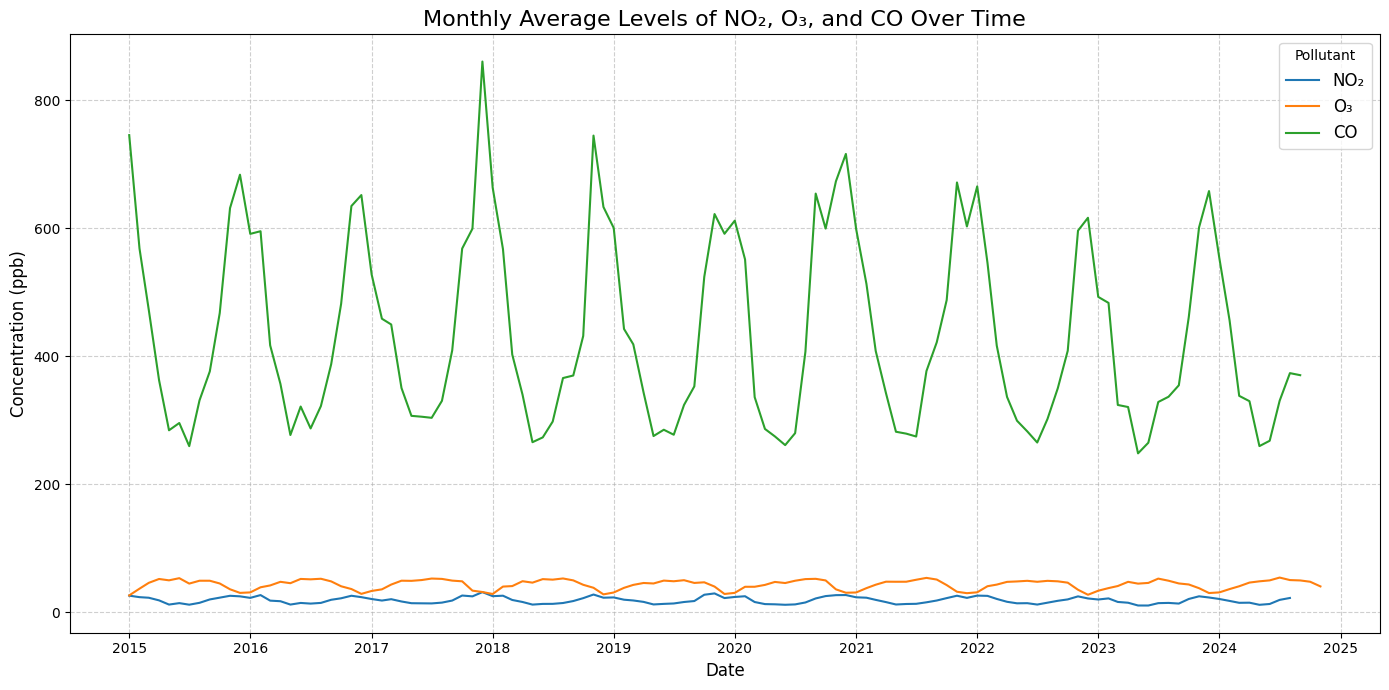

In [33]:
import matplotlib.pyplot as plt

# Prepare the NO2 data
no2_data['Date'] = pd.to_datetime(no2_data['Date'])
no2_data['YearMonth'] = no2_data['Date'].dt.to_period('M')
no2_monthly_avg = no2_data.groupby('YearMonth')['Daily Max 1-hour NO2 Concentration'].mean().reset_index()
no2_monthly_avg['YearMonth'] = no2_monthly_avg['YearMonth'].dt.to_timestamp()

# Prepare the Ozone data
ozone_data['Date'] = pd.to_datetime(ozone_data['Date'])
ozone_data['YearMonth'] = ozone_data['Date'].dt.to_period('M')
ozone_monthly_avg = ozone_data.groupby('YearMonth')['Daily Max 8-hour Ozone Concentration'].mean().reset_index()
ozone_monthly_avg['YearMonth'] = ozone_monthly_avg['YearMonth'].dt.to_timestamp()

# Prepare the CO data
co_data['Date'] = pd.to_datetime(co_data['Date'])
co_data['YearMonth'] = co_data['Date'].dt.to_period('M')
co_monthly_avg = co_data.groupby('YearMonth')['Daily Max 8-hour CO Concentration'].mean().reset_index()
co_monthly_avg['YearMonth'] = co_monthly_avg['YearMonth'].dt.to_timestamp()

# Merge the datasets on YearMonth
combined_data = no2_monthly_avg.merge(ozone_monthly_avg, on='YearMonth', how='outer').merge(co_monthly_avg, on='YearMonth', how='outer')
combined_data.columns = ['Date', 'NO2', 'Ozone', 'CO']

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(combined_data['Date'], combined_data['NO2'], label='NO₂')
plt.plot(combined_data['Date'], combined_data['Ozone'], label='O₃')
plt.plot(combined_data['Date'], combined_data['CO'], label='CO')

# Customize the plot
plt.title('Monthly Average Levels of NO₂, O₃, and CO Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Concentration (ppb)', fontsize=12)
plt.legend(title='Pollutant', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


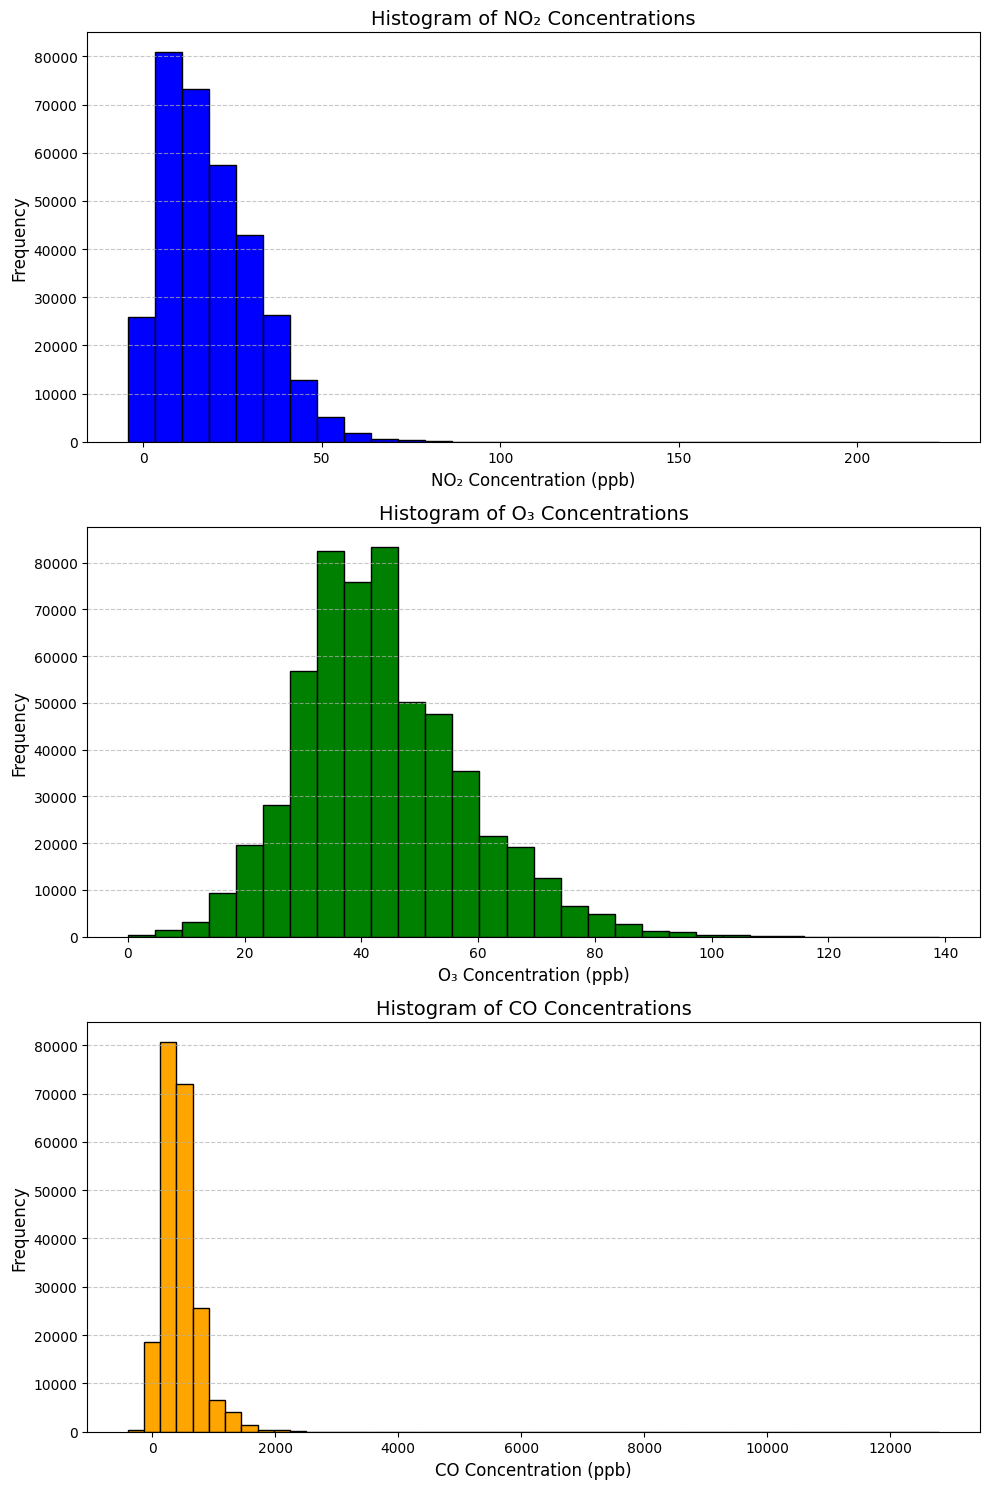

In [44]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot NO2 histogram
axs[0].hist(no2_data['Daily Max 1-hour NO2 Concentration'], bins=30, color='blue', edgecolor='black')
axs[0].set_title('Histogram of NO₂ Concentrations', fontsize=14)
axs[0].set_xlabel('NO₂ Concentration (ppb)', fontsize=12)
axs[0].set_ylabel('Frequency', fontsize=12)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot Ozone histogram
axs[1].hist(ozone_data['Daily Max 8-hour Ozone Concentration'], bins=30, color='green', edgecolor='black')
axs[1].set_title('Histogram of O₃ Concentrations', fontsize=14)
axs[1].set_xlabel('O₃ Concentration (ppb)', fontsize=12)
axs[1].set_ylabel('Frequency', fontsize=12)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot CO histogram
axs[2].hist(co_data['Daily Max 8-hour CO Concentration'], bins=50, color='orange', edgecolor='black')
axs[2].set_title('Histogram of CO Concentrations', fontsize=14)
axs[2].set_xlabel('CO Concentration (ppb)', fontsize=12)
axs[2].set_ylabel('Frequency', fontsize=12)
axs[2].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

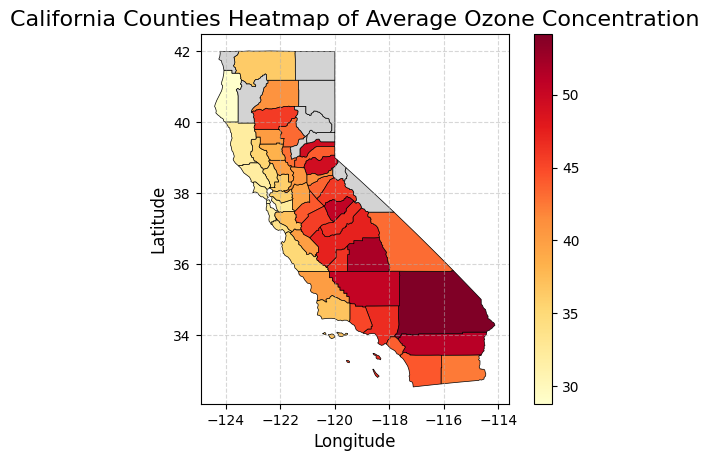

In [47]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the GeoJSON file
geojson_path = 'california-counties_780.geojson'
california_geojson = gpd.read_file(geojson_path)

# Fix any invalid geometries
california_geojson['geometry'] = california_geojson['geometry'].apply(
    lambda geom: geom if geom.is_valid else geom.buffer(0))


# Group by County and calculate the average AQI
county_aqi = ozone_data.groupby('County')['Daily Max 8-hour Ozone Concentration'].mean().reset_index()
county_aqi.columns = ['NAME', 'Average Ozone']  # Rename to match GeoJSON's 'NAME' column

# Merge GeoJSON with AQI data using the 'NAME' column
merged_geo = california_geojson.merge(county_aqi, on='NAME', how='left')

# Plot the heatmap with a sequential colormap
plt.figure(figsize=(12, 8))
merged_geo.plot(
    column='Average Ozone',
    cmap='YlOrRd',  # Sequential colormap for AQI values
    legend=True,
    edgecolor='black',
    linewidth=0.5,
    missing_kwds={"color": "lightgrey", "label": "No Data"}
)
plt.title('California Counties Heatmap of Average Ozone Concentration', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()